# Twitter Sentiment Analysis

---

## 1. Business Understanding

### 1.1 Overview

In the modern digital era, social media platforms like Twitter (now X) have become powerful channels for consumers to express opinions, experiences, and emotions about brands, products, and services. These views can significantly influence purchasing decisions, brand reputation, and marketing strategies.

Manually tracking and interpreting this vast, unstructured feedback is impractical for companies. As a result, organizations increasingly turn to **Natural Language Processing (NLP)** and **machine learning models** to automatically analyze and interpret tweet sentiments.

![NLP Diagram](nlp.image.png)
*Figure 1: Illustration of how Natural Language Processing (NLP) processes and classifies text to produce outputs.*

---

### 1.2 Business Problem

Businesses need to understand **how customers feel** about their products and brands in real time. However, the sheer volume and unstructured nature of tweets make manual analysis impossible.

The core challenge is to **automatically classify each tweet** as **positive**, **negative**, or **neutral**. This provides actionable insights to:

- Identify emerging trends in customer satisfaction or dissatisfaction.
- Track public reactions to product launches or campaigns.
- Inform data-driven marketing and customer engagement decisions.

---

### 1.3 Project Objective

**Main Objective:**  
To **develop an automated sentiment classification model** that accurately analyzes and categorizes sentiments expressed in posts on **X (formerly Twitter)** as **positive, negative, or neutral**, enabling real-time insights into customer perceptions of a brand to support **data-driven marketing** and **brand management decisions**.

**Specific Objectives:**  

1. **Build a Binary Classification Model:**  
   Develop and train a machine learning model to accurately distinguish between **positive** and **negative** sentiments in X posts.  

2. **Extend to Multiclass Classification:**  
   Enhance the model to classify posts into **three categories**:  
   - No emotion toward brand or product (Neutral)
   - Positive emotion  
   - Negative emotion  
   This should be done **while maintaining or improving overall classification performance**.

3. **Support Business Decision-Making:**  
   Deliver **interpretable sentiment insights** to marketing teams and brand managers to:  
   - Optimize campaigns  
   - Address customer concerns  
   - Enhance brand reputation  

---

### 1.4 Business Value

An accurate sentiment analysis system delivers substantial value to decision-makers by enabling:

- **Brand Monitoring**: Track customer feelings about the brand over time.  
- **Marketing Optimization**: Pinpoint campaigns that drive positive engagement or negative feedback.  
- **Customer Insights**: Uncover pain points or drivers of satisfaction.  
- **Faster Decision-Making**: Provide near real-time feedback analysis.  

---

### 1.5 Research Questions

1. **How do customers feel about the company’s products or services**, based on sentiments expressed on Twitter?  
2. **What key factors or topics drive positive and negative sentiments** toward the brand on Twitter?  
3. **How can Twitter sentiment insights support business decisions**, such as marketing strategies, customer engagement, and brand reputation management?

---

### 1.6 Success Criteria

The project's success will be measured by:

1. **Actionable Insights**: The system delivers meaningful customer opinion trends on Twitter, supporting data-driven decisions.  
2. **Brand Reputation Tracking**: Enables real-time monitoring of public sentiment, allowing timely responses to issues.  
3. **Marketing and Engagement Impact**: Insights improve strategies, engagement, and brand perception based on identified trends.


___
## 2. Data Understanding  

### 2.1 Overview  
The dataset used in this project is the **Brands and Products Emotions** dataset, obtained from **data.world** ([source link](https://data.world/crowdflower/brands-and-product-emotions)). It contains tweets evaluated for emotional content directed toward various products and brands.  

**Dataset characteristics:**  
- **Rows:** 9,093  
- **Columns:** 3  
- **Target variable:** `is_there_an_emotion_directed_at_a_brand_or_product`  
- **Feature variables:**  
  - `emotion_in_tweet_is_directed_at` – indicates the brand or product the emotion is directed toward  
  - `tweet_text` – contains the actual text of the tweet  

---

### 2.2 Target Variable Distribution  
**Observations:**  
- A significant portion of tweets **do not express a clear sentiment** toward a brand or product.  
- The dataset is **imbalanced**, with some emotion categories (e.g., negative) being underrepresented.  
- Tweets labeled **“I can’t tell”** are ambiguous and may be excluded during data cleaning.  
- Depending on the modeling goal, this can be framed as either:  
  - **Binary classification:** Positive vs. Negative  
  - **Multiclass classification:** Positive, Negative, Neutral, etc.  

---

### 2.3 Brand / Product Distribution  
Tweets in the dataset reference multiple brands and their associated products, such as:  
- **Apple:** iPhone, iPad, iPad or iPhone App, Other Apple product or service  
- **Google:** Google, Android, Android App, Other Google product or service  

**Observations:**  
- Multiple product names represent the same brand (e.g., iPhone and iPad → Apple).  
- Apple and Google dominate the dataset, making them suitable for comparative analysis.  
- Smaller product categories may be aggregated under their parent brands for consistency during preprocessing.  

---

### 2.4 Text Characteristics  
- Tweet lengths range from very short to long, reflecting natural user variability.  
- Texts contain **noisy elements** such as:  
  - Mentions (`@username`)  
  - Hashtags (`#keyword`)  
  - URLs, emojis, and punctuation  
- These artifacts require **text preprocessing** steps such as removal of special characters, tokenization, and lemmatization before modeling.  

---

### 2.5 Key Insights  
1. The dataset is sufficiently large for building a sentiment classification model.  
2. **Imbalanced sentiment distribution** warrants use of metrics like **F1-score** or **ROC-AUC** instead of accuracy alone.  
3. Text cleaning and normalization are crucial due to noise, abbreviations, and inconsistent brand mentions.  


In [3]:
# Load the data
import pandas as pd
df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding="ISO-8859-1")
df.head(7)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product


In [7]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [8]:
# check the shape of dataset
df.shape

(9093, 3)

In [9]:
# check for nall values
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [10]:
# check the unique values in "emotion_in_tweet_is_directed_at" column
df["emotion_in_tweet_is_directed_at"].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In [11]:
# check the unique values in "is_there_an_emotion_directed_at_a_brand_or_product" column
df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [12]:
# confirm that there are no NaNs
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [13]:
# check for duplicates
df.duplicated().sum()

22

## 3. Data Preparation  

### 3.1 Overview  
This phase involves cleaning, transforming, and organizing the raw dataset into a form suitable for analysis and model training. Since the dataset contains raw tweets, several preprocessing steps are necessary to handle noise, inconsistencies, and irrelevant information.  

---


### 3.2 Handling missing values and Duplicates
Drop columns with more than 50% missing values and drop the duplicates.

In [14]:
#dropping the duplicates
df.drop_duplicates(inplace=True)
#confirming that indeed they are dropped
df.duplicated().sum()

0

In [15]:
#Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Filter columns with more than 50% missing values
missing_greater_than_50 = missing_percentage[missing_percentage > 50]

# Display them
missing_greater_than_50

emotion_in_tweet_is_directed_at    63.818763
dtype: float64

In [16]:
#dropping the 'emotion_in_tweet_is_directed_at ' column
df=df.drop(columns=['emotion_in_tweet_is_directed_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9071 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9070 non-null   object
 1   is_there_an_emotion_directed_at_a_brand_or_product  9071 non-null   object
dtypes: object(2)
memory usage: 212.6+ KB


In [17]:
#checking the remaining missing values
df.isna().sum()

tweet_text                                            1
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

___
### 3.2 Renaming Columns
Rename columns for readibility.

Rename 'is_there_an_emotion_directed_at_a_brand_or_product' to 'sentiment' and 'tweet_text' to 'tweet'
___


In [18]:
#renaming the two columns
df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product':'sentiment','tweet_text':'tweet'}, inplace=True)
df.tail() # confirming with our last 5 that indeed the column names have been renamed.


,tweet,sentiment
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,No emotion toward brand or product


In [19]:
#inspect the sentiments.
df['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5376
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

After inspecting the sentiments, we notice that we have 4 categories: **No emotion towards a brand or product**, **positive emotion**, **negative emotion** and **I can't tell**. 
___

C:\Users\USER\AppData\Local\Temp\ipykernel_7724\216077275.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment',palette='coolwarm', order=df['sentiment'].value_counts().index)


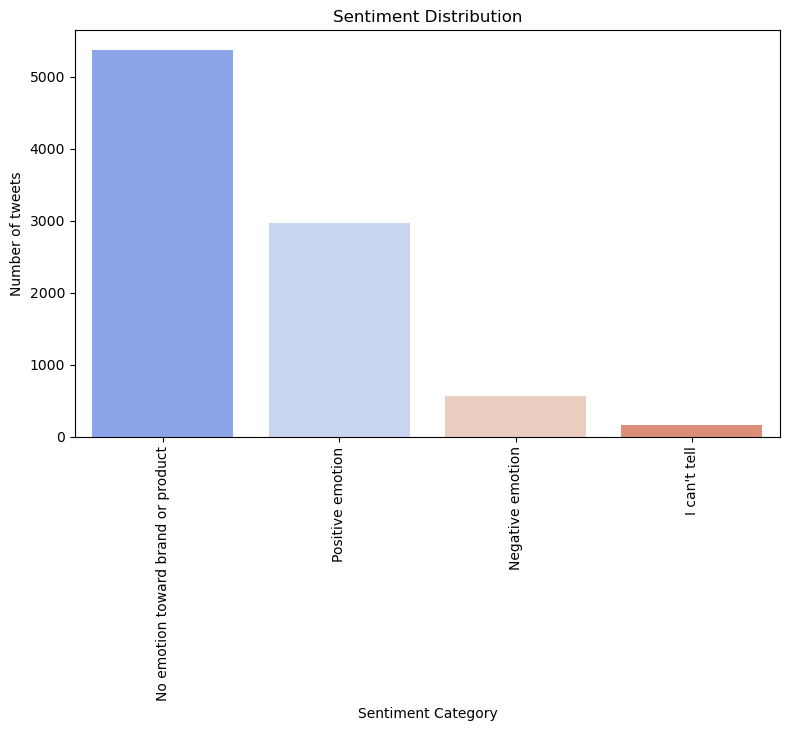

In [20]:
#visualizing sentiment distibution
#How many tweets are positive, negative, cant tell or have no emotion towards a brand or product.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment',palette='coolwarm', order=df['sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of tweets')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7724\3262277196.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tweet'].fillna('Unknown', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7724\3262277196.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='tweet_length', data=df, palette='Set2')


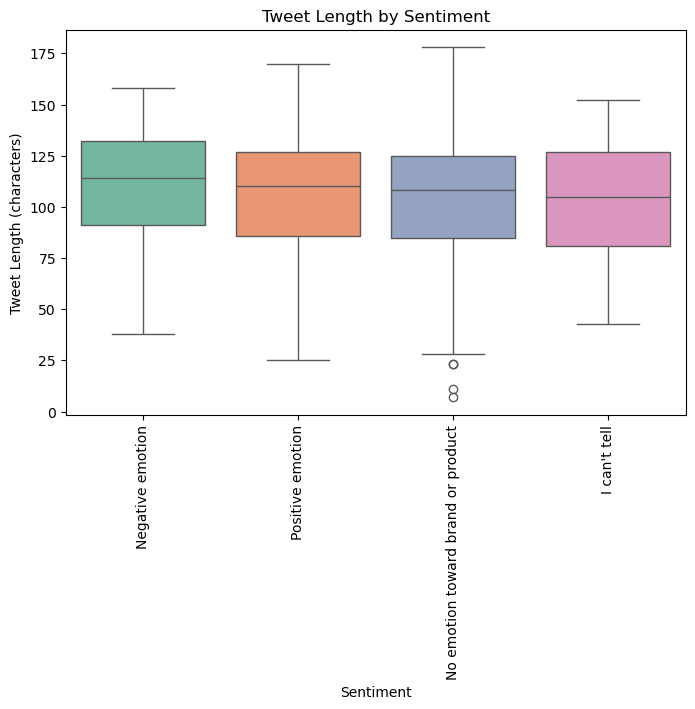

In [21]:
#visualizing tweet length by sentiment.
#Tweet Length by sentiment
#create a new column tweet length.
df['tweet'].fillna('Unknown', inplace=True)
df['tweet_length']=df['tweet'].apply(len)
#plotting
plt.figure(figsize=(8,5))
sns.boxplot(x='sentiment', y='tweet_length', data=df, palette='Set2')
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (characters)')
plt.xticks(rotation=90)
plt.show()

___
Tweets expressing positive or neutral emotions tend to be slightly longer than negative ones, suggesting that users with positive feedback often provide more context or details in their messages.
___

In [22]:
#handling the labels to make work easier.
binary_df=df[df['sentiment'].isin(['Positive emotion','Negative emotion'])]
#for multiclass it will just be the regular df.
binary_df['sentiment'].value_counts()

sentiment
Positive emotion    2970
Negative emotion     569
Name: count, dtype: int64

In [23]:
#cleaning
import re
import string
def clean_text(text):
    text=text.lower()#lowercase
    text=re.sub(r'http\S+|www\S+', '', text) #removing URLs
    text=re.sub(r'@\w+', '', text) #mentions
    text = re.sub(r'#', '', text) #hashtags
    text = re.sub(r'\d+', '', text) #numbers
    text = text.strip() #remove extra whitespace
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation.
    return text
#applying it to my tweets column
#for binary df
binary_df.loc[:, 'cleaned_tweet'] = binary_df['tweet'].apply(clean_text)
#multiclass
df.loc[:, 'cleaned_tweet'] = df['tweet'].apply(clean_text)
binary_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_7724\1795382804.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_df.loc[:, 'cleaned_tweet'] = binary_df['tweet'].apply(clean_text)


,tweet,sentiment,tweet_length,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,127,i have a g iphone after hrs tweeting at rise...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,139,know about awesome ipadiphone app that youll...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,79,can not wait for ipad also they should sale t...
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,82,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,131,great stuff on fri sxsw marissa mayer google t...


In [24]:
df.head()

,tweet,sentiment,tweet_length,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,127,i have a g iphone after hrs tweeting at rise...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,139,know about awesome ipadiphone app that youll...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,79,can not wait for ipad also they should sale t...
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,82,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,131,great stuff on fri sxsw marissa mayer google t...


In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # tokenize
    tokens = word_tokenize(text)
    # remove stopwords
    tokens = [word for word in tokens if word.lower() not in stop_words]
    # lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens
# Apply to dataframes
df['tokens'] = df['cleaned_tweet'].apply(preprocess_text)
binary_df['tokens'] = binary_df['cleaned_tweet'].apply(preprocess_text)
df.head()
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\USER\AppData\Local\Temp\ipykernel_7724\2763193766.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_df['tokens'] = binary_df['cleaned_tweet'].apply(preprocess_text)


,tweet,sentiment,tweet_length,cleaned_tweet,tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,127,i have a g iphone after hrs tweeting at rise...,"[g, iphone, hr, tweeting, riseaustin, dead, ne..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,139,know about awesome ipadiphone app that youll...,"[know, awesome, ipadiphone, app, youll, likely..."
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,79,can not wait for ipad also they should sale t...,"[wait, ipad, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,82,i hope this years festival isnt as crashy as t...,"[hope, year, festival, isnt, crashy, year, iph..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,131,great stuff on fri sxsw marissa mayer google t...,"[great, stuff, fri, sxsw, marissa, mayer, goog..."


In [26]:
#working on my binary first
#encoding before splitting to prevent data leakage.
from sklearn.preprocessing import LabelEncoder
#instantiating the labelencoder
le=LabelEncoder()
binary_df['label']=le.fit_transform(binary_df['sentiment'])
binary_df[['sentiment','label','cleaned_tweet']].head()

C:\Users\USER\AppData\Local\Temp\ipykernel_7724\3204817769.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_df['label']=le.fit_transform(binary_df['sentiment'])


,sentiment,label,cleaned_tweet
0,Negative emotion,0,i have a g iphone after hrs tweeting at rise...
1,Positive emotion,1,know about awesome ipadiphone app that youll...
2,Positive emotion,1,can not wait for ipad also they should sale t...
3,Negative emotion,0,i hope this years festival isnt as crashy as t...
4,Positive emotion,1,great stuff on fri sxsw marissa mayer google t...


C:\Users\USER\AppData\Local\Temp\ipykernel_7724\3110840990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=binary_df, x='sentiment',palette='coolwarm', order=binary_df['sentiment'].value_counts().index)


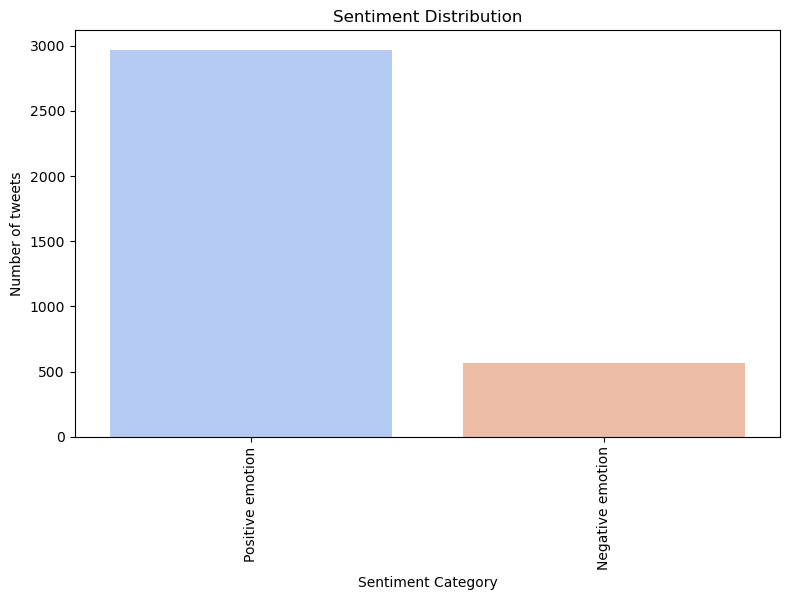

In [27]:
#visualizing sentiment distribution in binary classification.
plt.figure(figsize=(8,5))
sns.countplot(data=binary_df, x='sentiment',palette='coolwarm', order=binary_df['sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of tweets')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [28]:
#splitting into training and test set. Noting from the above visualization that the positive is dominating the negative.
from sklearn.model_selection import train_test_split
#defining the variables
X=binary_df['cleaned_tweet']
y=binary_df['label']
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42,stratify=y)

In [29]:
#converting text to numeric features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
#instantiating the vectorizer
vectorizer=TfidfVectorizer(max_features=5000, ngram_range=(1,2))
#fit the vectorizer into the training set and transform the test set
X_train_vec= vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)


## Multiclass

In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Fit and transform your target column
label= le.fit_transform(df['sentiment'])

print(dict(zip(le.classes_, le.transform(le.classes_))))


{"I can't tell": 0, 'Negative emotion': 1, 'No emotion toward brand or product': 2, 'Positive emotion': 3}


We’ll use TF-IDF (Term Frequency–Inverse Document Frequency) because
it weighs how important each word is in a tweet relative to how often it appears overall.

Why we used TF-IDF 

Common words like “the”, “is” get lower weight

Rare but important words like “hate” or “love” get higher weight

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF 
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # 1- and 2-word combinations

# Fit and transform the clean text
X = tfidf.fit_transform(df['cleaned_tweet'])

# Target variable(Because it represents the emotion category we want to predict from the text.)
y = df['sentiment']
print("Shape of TF-IDF matrix:", X.shape)


Shape of TF-IDF matrix: (9071, 5000)


### Splitting the data

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [38]:
# Get feature names
feature_names = tfidf.get_feature_names_out()

# View first 20 words
feature_names[:20]


array(['aapl', 'ab', 'able', 'able to', 'about', 'about android',
       'about apples', 'about google', 'about how', 'about ipad',
       'about iphone', 'about it', 'about our', 'about sxsw', 'about the',
       'about to', 'abt', 'acc', 'acc ballroom', 'access'], dtype=object)

C:\Users\USER\AppData\Local\Temp\ipykernel_7724\866306651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Spectral', order=df['sentiment'].value_counts().index)


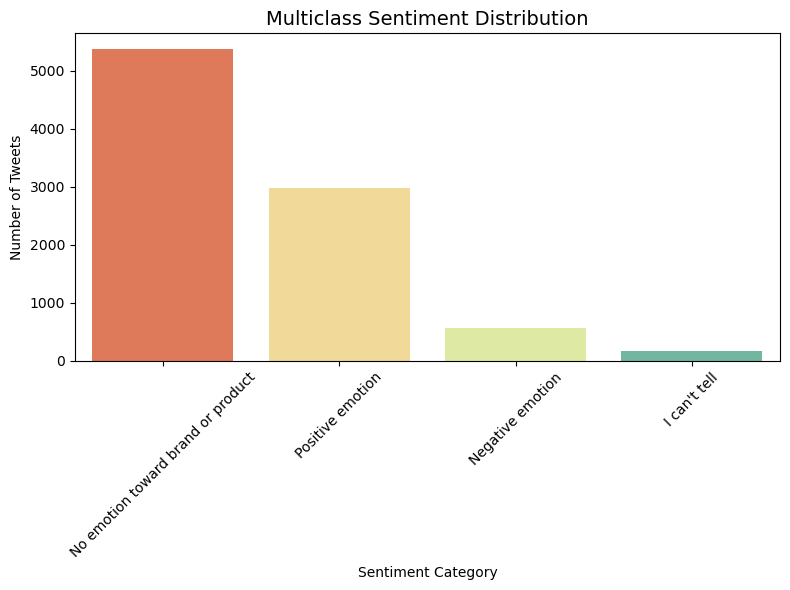

In [40]:
# lets plot the distribution of the multiclass to see if its balanced
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='sentiment', palette='Spectral', order=df['sentiment'].value_counts().index)
plt.title("Multiclass Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_7724\1795880023.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words, y='word', x='count', palette='mako')


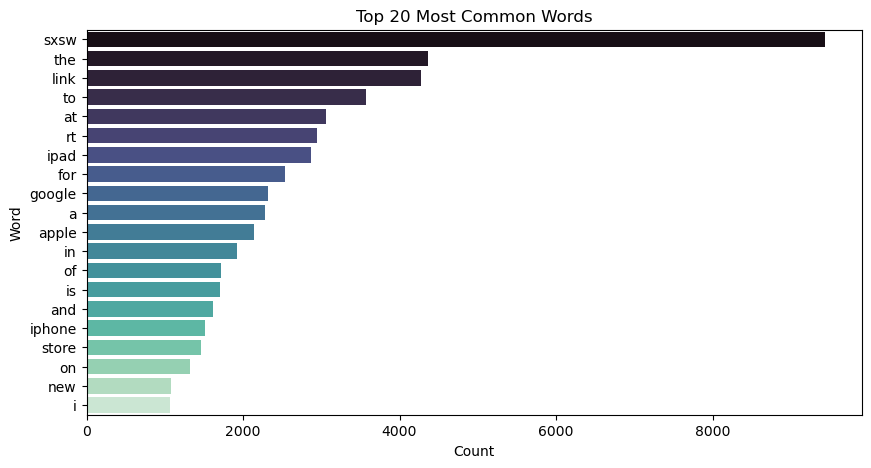

In [41]:
from collections import Counter
import pandas as pd

all_words = " ".join(df['cleaned_tweet']).split()
word_counts = Counter(all_words)
common_words = pd.DataFrame(word_counts.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10,5))
sns.barplot(data=common_words, y='word', x='count', palette='mako')
plt.title("Top 20 Most Common Words")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()
